# Stout - Credit Card Fraud Analysis
https://www.kaggle.com/ntnu-testimon/paysim1

## Context 
Column Guide:
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#loading in data
df = pd.read_csv('fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [2]:
df.shape

(6362620, 11)

OBSERVATION: Quite a large dataset - 6,362,620 rows, 11 columns.

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## How many fraudulent transactions are there?

In [6]:
df[df.isFraud == 1].count()

step              8213
type              8213
amount            8213
nameOrig          8213
oldbalanceOrg     8213
newbalanceOrig    8213
nameDest          8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
isFlaggedFraud    8213
dtype: int64

### What kind of transactions are there?

<AxesSubplot:>

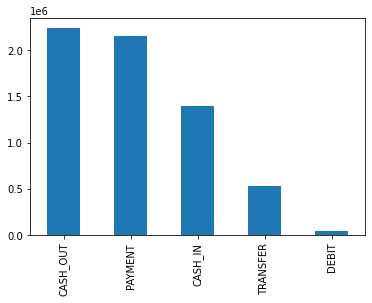

In [7]:
df['type'].value_counts().plot(kind='bar')

A majority of transactions fall under 'CASH_OUT' and 'PAYMENT'. 

In [8]:
df['amount'].mean()

179861.90354913071

In [9]:
onlyFraud_df = df[df.isFraud == 1]
onlyFraud_df['amount'].mean()

1467967.299140387

### What type of transactions are fraudulent?

In [10]:
df.groupby(['type','isFraud']).count()['step']



type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: step, dtype: int64

### When do fraudulent transactions occur?

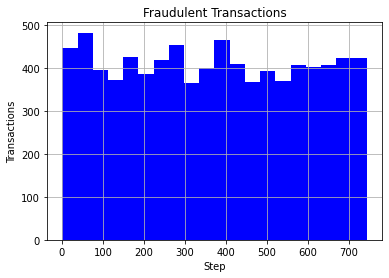

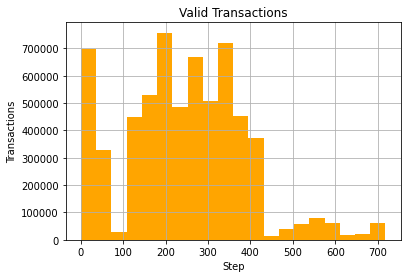

In [35]:
df[(df['isFraud'] == 1)].hist(column="step",color="blue",bins=20)
plt.xlabel('Step')
plt.ylabel('Transactions')
plt.title('Fraudulent Transactions')
df[(df['isFraud'] == 0)].hist(column="step",color="orange",bins=20)
plt.xlabel('Step')
plt.ylabel('Transactions')
plt.title('Valid Transactions')
plt.show()

### Observation:
The amount of fraudulent transactions seems fairly uniform over time. The valid transactions are skewed towards the left

### Bar Chart visualization

<AxesSubplot:xlabel='type'>

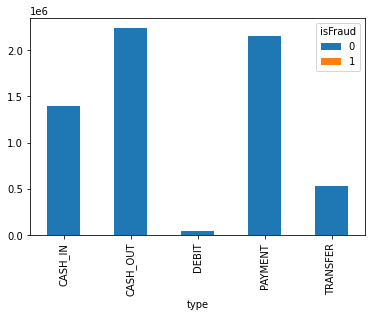

In [11]:
df.groupby(['type', 'isFraud']).size().unstack().plot(kind='bar', stacked=True)

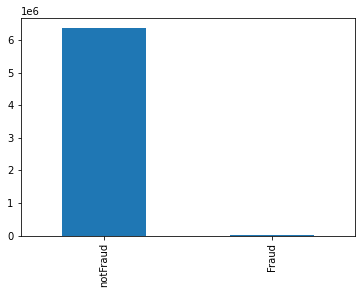

In [29]:
ax = df['isFraud'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels = ['notFraud','Fraud'])
plt.show()

### Why are there no fraudulent transactions on the chart?

In [12]:
print("Amount of Fraudulent Transactions:",onlyFraud_df['isFraud'].value_counts()[1]) 
print("\nAmount of Transactions:",df.shape[0])

Amount of Fraudulent Transactions: 8213

Amount of Transactions: 6362620


The dataset is imbalanced, there are over 6 million transactions, but only 8213 fraudulent transcations. So the fraudulent transactions are there, its just hard to see. This data must be split when creating our prediction model.

## Observation
Only CASH_OUT and TRANSFER transactions have fraudulent transactions. This makes sense, as a scammer would perform fraudulent transactions to transfer money to themselves or take out cash.

## Flagged Fraud

Only 16 TRANSFER transactions have been flagged as fraud and no CASH_OUT transactions have been flagged. The isFlaggedFraud model is ineffective, not needed for our prediction model,and can be removed from the dataset.

In [13]:
df.groupby(['type','isFlaggedFraud']).count()['step']

type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
Name: step, dtype: int64

In [14]:
df = df.drop(['isFlaggedFraud'], axis = 1)

## Correlation Heatmap

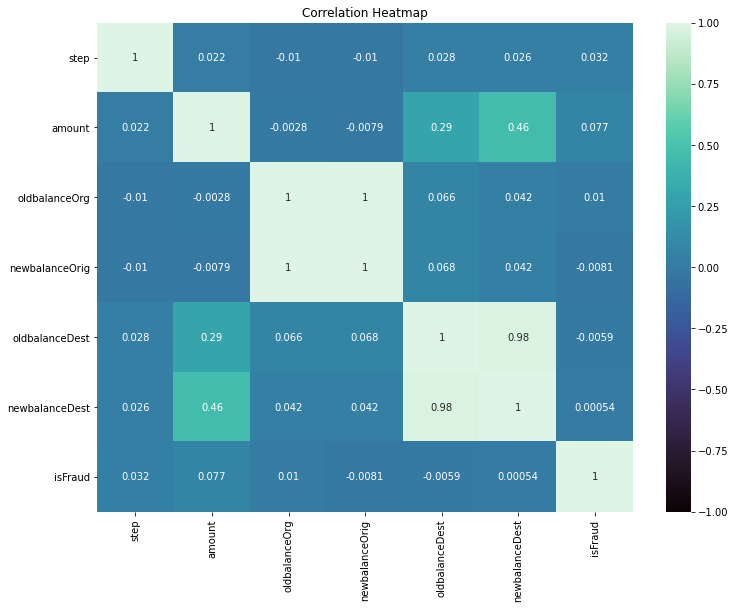

In [15]:
corr = df.corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr,annot =True, vmin = -1.0, cmap = 'mako')
plt.title('Correlation Heatmap')
plt.show()

### Observations:

The most important feature to observe is the "isFraud" feature. Unfortunately, there are no variables that have a clear correlation with with Fraud. We can use feature engineering to create more parameters that will hopefully give more insight.

# Feature Engineering

## Merchant or Customer?
'NameOrig' Starts off with either 'C' or 'M' to indicate if the transaction was done by a consumer or a merchant,
we can create an new column to see if there is a relationship between the parties and fraud.

In [16]:
df['isCustomer'] = df['nameDest'].str.contains('C').astype(int)
df.groupby(['isFraud'])['isCustomer'].value_counts()

isFraud  isCustomer
0        1             4202912
         0             2151495
1        1                8213
Name: isCustomer, dtype: int64

### Observation
Everyone who got scammed was a customer, this data was not helpful and can be dropped.

In [17]:
df = df.drop(['isCustomer'],axis = 1)

## Model Building

In [18]:
# Normalizing data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
features = df[['step','amount','oldbalanceOrg','newbalanceOrig',
            'oldbalanceDest','newbalanceDest']]
y = df['isFraud']
x = scale.fit(features) 
features_scaled = pd.DataFrame(x.transform(features), columns=['step','amount', 'oldbalanceOrig', 'newbalanceOrig',
                                                  'oldbalanceDest', 'newbalanceDest'])

### One Hot Encoding
Type is a categorical variable, in order to use it with our model, we must quantify it using One Hot Encoding.

In [19]:
df_temp = pd.DataFrame(pd.get_dummies(df['type']))
features_scaled = features_scaled.join(df_temp, how='outer')
features_scaled

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,1,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,1,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0,0,0,0,1
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0,1,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,0,1,0,0,0
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,0,0,0,0,1
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,0,1,0,0,0
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,0,0,0,0,1


Now we can split the model into training and test sets.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.3, random_state=1)


### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.97      0.78      0.87      2468

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



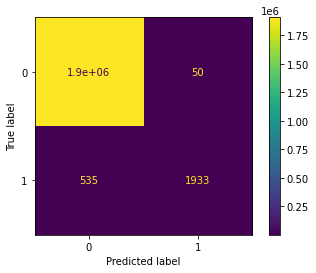

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))
metrics.plot_confusion_matrix(rfc,X_test,y_test)

### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc = DecisionTreeClassifier(random_state=1)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.88      0.88      0.88      2468

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



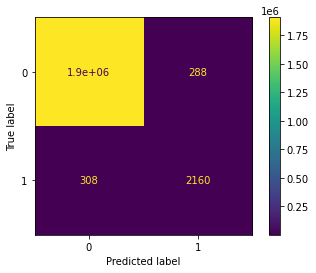

In [26]:
from sklearn.metrics import confusion_matrix
metrics.plot_confusion_matrix(dtc,X_test,y_test)

## Summary

### Random Forest Classifier
This model performed fairly well with a precision of .97, recall of .78, and a f1-score of .87.

### Decision Tree Classifier
This model was more even across the board scoring .88 for precision,recall, and f1-score.

### Possible improvements
- using more models (K-Nearest Neighbors, Logistic Regression, Extreme Gradient Boosting)
- More feature engineering (Check if customers had multiple fraud cases, convert step to time of day)
### Assumptions made
- The given data is true and correct
- There are no missing values/incorrect values